### Lecture 9, 10, and 11: Thyroid Example

### Setup imports

In [1]:
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### Load data

In [3]:
thyroid_df = pd.read_csv('thyroid_data.csv')

thyroid_df.shape

(383, 17)

In [4]:
thyroid_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
thyroid_df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

### One hot encode the categorical columns

In [6]:
# define a list of columns to not one hot encode
cols_to_exclude = ['Age', 'Recurred']

# make a list of cols to one hot encode
categorical_cols = [col for col in thyroid_df.columns if col not in cols_to_exclude]

categorical_cols

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

### Define the column transformer

In [7]:
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

### Apply the transformation

In [8]:
transformed_data = column_transformer.fit_transform(thyroid_df)

transformed_data

array([[1.0, 0.0, 1.0, ..., 0.0, 27, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 34, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 30, 'No'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 72, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 61, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 67, 'Yes']],
      shape=(383, 56), dtype=object)

In [9]:
# get the encoded column names
encoded_cols = column_transformer.named_transformers_['encoder'].get_feature_names_out()

# convert to list
encoded_cols = list(encoded_cols)

# add the passed through column names
encoded_cols.append('Age')
encoded_cols.append('Recurred')

encoded_cols

['Gender_F',
 'Gender_M',
 'Smoking_No',
 'Smoking_Yes',
 'Hx Smoking_No',
 'Hx Smoking_Yes',
 'Hx Radiothreapy_No',
 'Hx Radiothreapy_Yes',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary',
 'Focality_Multi-Focal',
 'Focality_Uni-Focal',
 'Risk_High',
 'Risk_Intermediate',
 'Risk_Low',
 'T_T1a',
 'T_T1b',
 'T_T2',
 'T_T3a',
 'T_T3b',
 'T_T4a',
 'T_T4b',
 'N_N0',
 'N_

In [10]:
# convert to dataframe
transformed_df = pd.DataFrame(transformed_data, columns=encoded_cols)

transformed_df

,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,Yes


### Separate ML input and output

In [11]:
X = transformed_df.drop('Recurred', axis=1)
y = transformed_df['Recurred']

X.head()
y

0       No
1       No
2       No
3       No
4       No
      ... 
378    Yes
379    Yes
380    Yes
381    Yes
382    Yes
Name: Recurred, Length: 383, dtype: str

### Train-test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

X_train.shape

(283, 55)

### Define the hyperparameter grid (random forest)
This will need to be different for k-nearest neighbors

In [13]:
hyperparam_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [30,  60, 90]
}

### Define the model and run grid search

In [ ]:
# define the classifier
rf_classifier = RandomForestClassifier()

# define the grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=hyperparam_grid, cv=2)

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'random_seed'

In [15]:
# run the grid search
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_hyperparams = grid_search.best_params_

best_hyperparams

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

### Make a final model and evaluate it

In [17]:
# use hyperparameters determined by grid search
final_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=8,
    max_features='sqrt',
    n_estimators=60,
)

# train the final model
final_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",60
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [18]:
# generate test set predictions
y_pred = final_model.predict(X_test)

y_pred 

array(['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No'], dtype=object)

In [19]:
# compute the accuracy
final_model.score(X_test, y_test)

0.98

### Get and plot feature importances

In [20]:
feature_importances = final_model.feature_importances_

print(feature_importances)
len(feature_importances)


[1.26796833e-02 9.52141851e-03 9.42410905e-03 6.98166819e-03
 4.50900406e-03 2.48926053e-03 5.98672448e-04 0.00000000e+00
 2.51827269e-03 6.07039092e-04 5.52307733e-03 2.12863373e-04
 3.75607065e-03 0.00000000e+00 9.54515447e-03 1.00805399e-04
 1.16702698e-02 4.40047700e-03 1.02618345e-02 5.76233965e-04
 2.44322123e-03 5.90875423e-02 1.23153274e-04 6.32370968e-03
 2.59404133e-03 2.51472221e-03 1.87114101e-03 3.96489949e-03
 1.16969843e-02 9.83971635e-03 2.72433891e-02 2.75807983e-02
 1.00543281e-01 3.25408130e-03 3.98776078e-03 1.75954560e-02
 9.67937427e-03 1.22997141e-02 8.09932995e-03 1.68866462e-03
 4.74437261e-02 9.17348711e-03 2.77853759e-02 3.85523562e-03
 3.44388341e-03 2.19924971e-02 1.40383602e-02 5.87508093e-04
 1.23153579e-03 2.13646844e-03 9.13573764e-03 1.10859735e-01
 3.29129757e-02 2.60088089e-01 4.75084902e-02]


55

In [21]:
# convert to a dataframe
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

feature_importance_df

,feature,importance
0,Gender_F,0.012680
1,Gender_M,0.009521
2,Smoking_No,0.009424
3,Smoking_Yes,0.006982
4,Hx Smoking_No,0.004509
5,Hx Smoking_Yes,0.002489
6,Hx Radiothreapy_No,0.000599
7,Hx Radiothreapy_Yes,0.000000
8,Thyroid Function_Clinical Hyperthyroidism,0.002518
9,Thyroid Function_Clinical Hypothyroidism,0.000607


<Axes: xlabel='feature'>

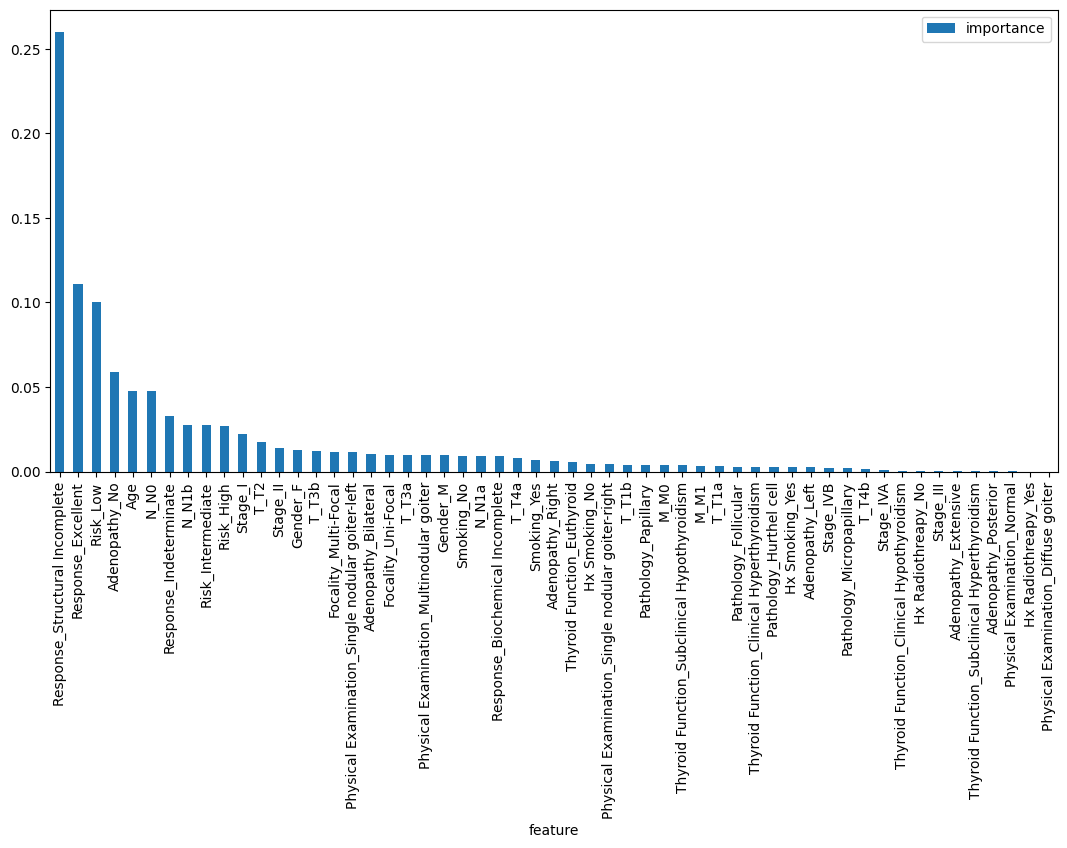

In [23]:
# sort the dataframe
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# make a bar plot
feature_importance_df.plot.bar(x='feature',  y='importance', figsize=(13, 6))

### Import the K neighbors classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

### Set up hyperparameter grid
Try different options for: 
n_neighbors, 
weights, 
algorithm

In [ ]:
k_neighbors_params = {
    'n_neighbors': [3, 4, 5, 6, 7, 8],
    'weights': ['uni']
}

### Run grid search to get best params

### Train model with best params

### Evaluate the accuracy of the model

# Start of Lecture 11 Notes

### Look at confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

con_matrix

array([[28,  1],
       [ 1, 70]])

### Calculate the different metrics

In [28]:
# get individual values from confusion matrix
tp, fp, fn, tn = con_matrix.ravel()

tp, fp, fn, tn

(np.int64(28), np.int64(1), np.int64(1), np.int64(70))

In [29]:
sensitivity = tp / (tp + fn)
sensitivity 

np.float64(0.9655172413793104)

### We could calculate the other metrics here

### Instead lets use classification report

In [31]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels=['Yes', 'No'])

print(report)

              precision    recall  f1-score   support

         Yes       0.97      0.97      0.97        29
          No       0.99      0.99      0.99        71

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



### Look at area under the curve

In [33]:
y_pred

array(['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No'], dtype=object)

In [36]:
from sklearn.metrics import roc_auc_score

y_pred_probability = final_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_probability)

roc_auc

0.9893152015541525

### Plot the ROC Curve

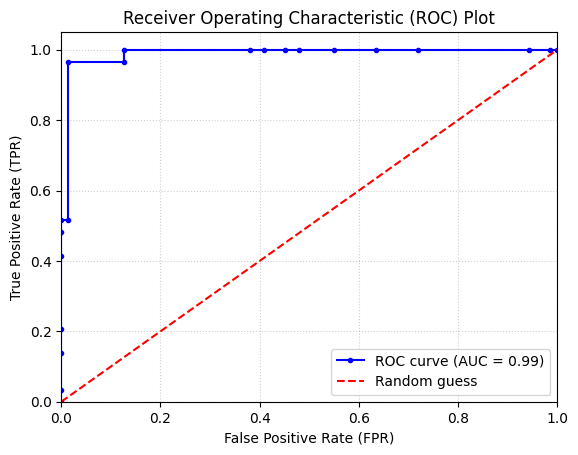

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability, pos_label='Yes')

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', marker='.', label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot the random guess line (diagonal line)
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random guess')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Plot')

# Add a legend to the plot
plt.legend(loc='lower right')

# Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Add grid lines for better readability
plt.grid(True, linestyle=':', alpha=0.6)

# Show the plot
plt.show()

# Lecture 11 Activity

1. import the support vector classifier (SVC)
2. run a grid search to find best hyperparameters. (test these values the parameters: 
C: [0.1, 1.0, 10], 
kernel: ['linear', 'poly', 'rbf'], 
gamma: ['scale', 'auto']
)
3. train a final model
4. make test set predictions
5. generate a classification report
6. get the ROC data
7. make an ROC plot for the SVC

In [44]:
from sklearn.svm import SVC

In [46]:
# make parameter grid
svc_param_grid = {
    'C': [0.1, 1.0, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [48]:
svc = SVC()

grid_search_svc = GridSearchCV(estimator=svc, param_grid=svc_param_grid)

In [49]:
grid_search_svc.fit(X_test, y_test)

best_params_svc = grid_search_svc.best_params_

best_params_svc

{'C': 1.0, 'gamma': 'auto', 'kernel': 'poly'}